In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load Data from CSV file
data = pd.read_csv("C:/Users/Prime/Downloads/covid19_data (2).csv")

In [3]:
# Data Preprocessing
data = data[['date', 'location', 'total_cases', 'total_deaths', 'total_vaccinations']]
data = data.dropna()
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by=['location', 'date'])


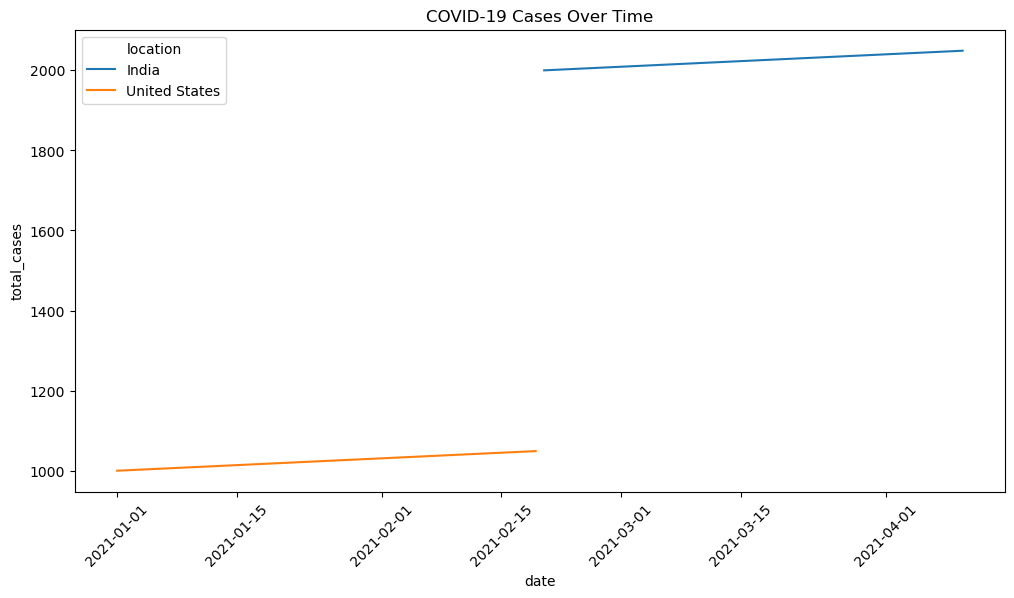

In [4]:
# Ensure there is data for the United States
if not data[data['location'] == 'United States'].empty:
 # Exploratory Data Analysis
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='total_cases', hue='location', data=data[data['location'].isin(['United States', 'India', 'Brazil'])])
    plt.title("COVID-19 Cases Over Time")
    plt.xticks(rotation=45)
    plt.show()

In [5]:
 # Time Series Forecasting - Exponential Smoothing
us_data = data[data['location'] == 'United States']
 if len(us_data) > 90:
    train = us_data.iloc[:-90]
    test = us_data.iloc[-90:]

    model = ExponentialSmoothing(train['total_cases'], trend='add', seasonal=None).fit()
    predictions = model.forecast(steps=90)

    plt.figure(figsize=(10,5))
    plt.plot(train['date'], train['total_cases'], label='Training Data')
    plt.plot(test['date'], test['total_cases'], label='Actual Cases')
    plt.plot(test['date'], predictions, label='Forecasted Cases', linestyle='dashed')
    plt.legend()
    plt.title("COVID-19 Cases Forecast (90 days)")
    plt.show()

In [6]:
# Machine Learning for Vaccination Prediction
features = ['total_cases', 'total_deaths']
target = 'total_vaccinations'

X = data[features]
y = data[target]

if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
# Model Evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.5629999999999654
Mean Squared Error: 0.4305499999999676
R² Score: 0.9999995510293399


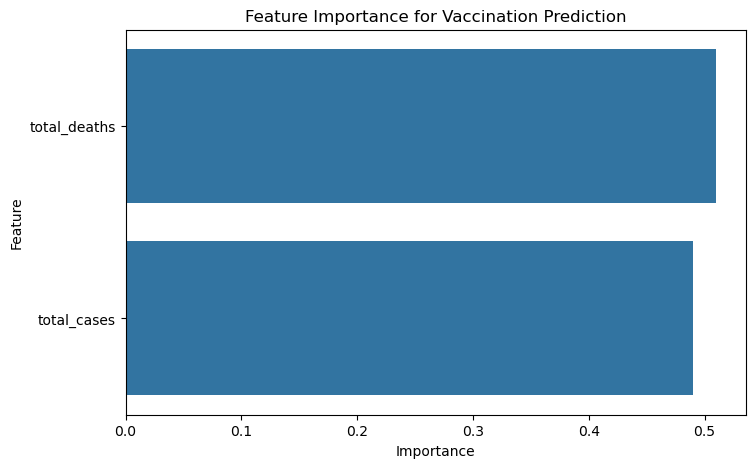

In [7]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance for Vaccination Prediction")
plt.show()

    
        

        
    

        
    